
## Practice
1. Read an image from file.
2. Show the original image using matplotlib.pyplot!
3. For each pixel, compute its distance from image center.
4. For each pixel, set weight = (360. - distance) / 360.
5. For each pixel, multiply its brightness by the weight to produce vignetting effect
6. Show the vignetting image using matplotlib.pyplot

In [39]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np

In [40]:
#1. Read an image from file

img = cv2.imread('lena.png')

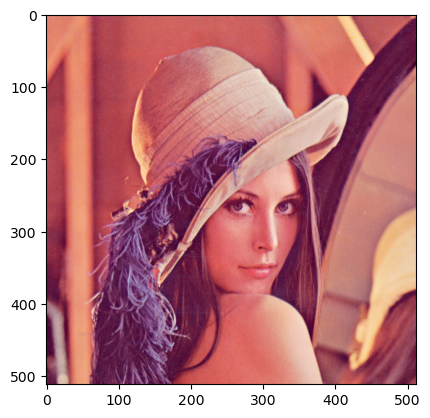

In [41]:
#2. Show the original image using matplotlib.pyplot!

# Transform image format from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgplot = plt.imshow(img)
plt.show()                                      

360.62445840513925
-0.0017346066809423633


True

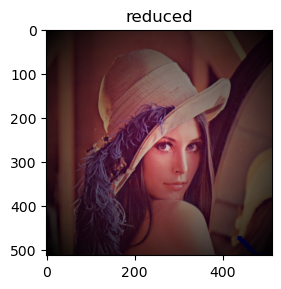

In [82]:
#3. For each pixel, compute its distance from image center
height, width, channel = img.shape

center = (img.shape[0]/2, img.shape[1]/2)

maxdist = 0
maxpoint = None

for point in range(0, height):

    for j in range(0, width):
        dist = np.sqrt((center[0] - point)**2 + (center[1] - j)**2)
        weight = (360. - dist) / 360
        
        #5. For each pixel, multiply its brightness by the weight to produce vignetting effect
        img[point,j, :] =img[point,j, :] * weight
        
print(dist) 

#4. For each pixel, set weight = (360. - distance) / 360.

print(weight)

plt.subplot(1,2,2)
plt.title('reduced')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

#need to re-order color channels again!
cv2.imwrite('611221201.png', img)

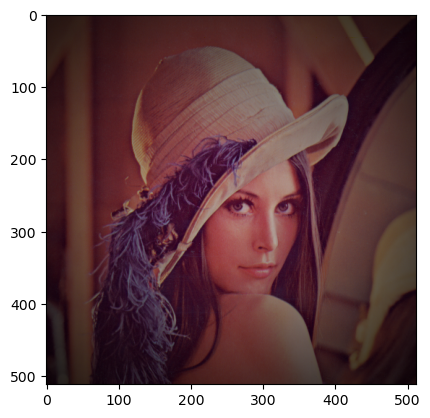

In [ ]:
#6. Show the vignetting image using matplotlib.pyplot

rows, cols = img.shape[:2]

# generating vignette mask using Gaussian kernels

kernel_x = cv2.getGaussianKernel(cols,200)
kernel_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(img)

# applying the mask to each channel in the input image

for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

imgplot = plt.imshow(output)
plt.show()